##### 影像的疊加與相減
這篇教學會介紹使用 OpenCV 的 add()、addWeighted() 和 subtract() 方法，將不同的影像疊加或相減後，變成新的影像。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### add() 影像疊加 
使用 OpenCV 的 add() 方法，可以將不同的影像中，同樣位置像素的顏色數值相加，\
例如圖片 A 某個像素為 (255,0,0) 藍色，\
圖片 B 為 (0,255,255) 黃色，\
疊加在一起後就會變成白色 (255,255,255)，疊加後最大的數值為 255，\
下方的例子，會將三張圖片疊加成一張圖片。

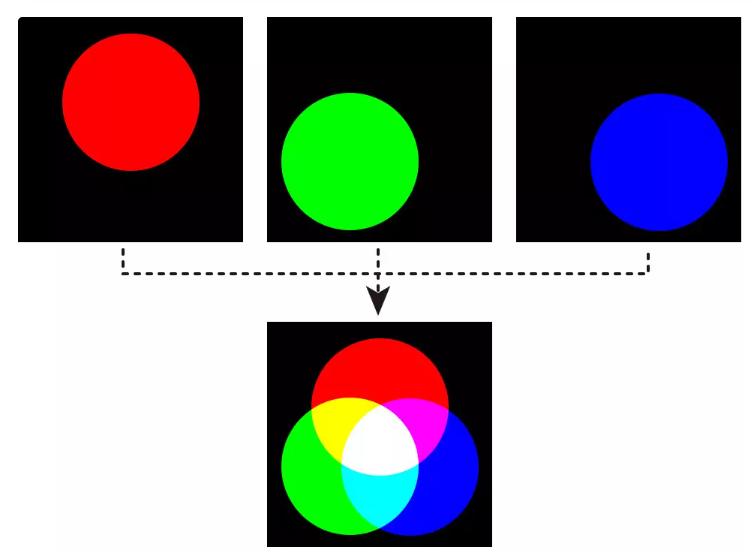

In [ ]:
import cv2
img_red = cv2.imread('test-red.png')
img_green = cv2.imread('test-green.png')
img_blue = cv2.imread('test-blue.png')

output = cv2.add(img_red, img_green)  # 疊加紅色和綠色
output = cv2.add(output, img_blue)    # 疊加藍色

cv2.imshow('oxxostudio', output)
cv2.waitKey(0)     # 按下任意鍵停止
cv2.destroyAllWindows()

##### addWeighted() 影像權重疊加 
使用 OpenCV 的 addWeighted() 方法，可以將不同的影像中，同樣位置像素的顏色數值，以「指定的權重」( 0～1 ) 進行相加，相加後，\
就會產生類似半透明的效果，使用方法如下：

In [ ]:
cv2.addWeighted(img1, alpha, img2, beta, gamma)
# img1 第一張圖
# img2 第二張圖
# 計算公式：img1*alpha + img2*beta + gamma
# alpha、beta為兩張圖的權重，gamma為亮度值


下方的例子，會將兩張圖片以權重疊加的方式，組合成一張新的圖片。

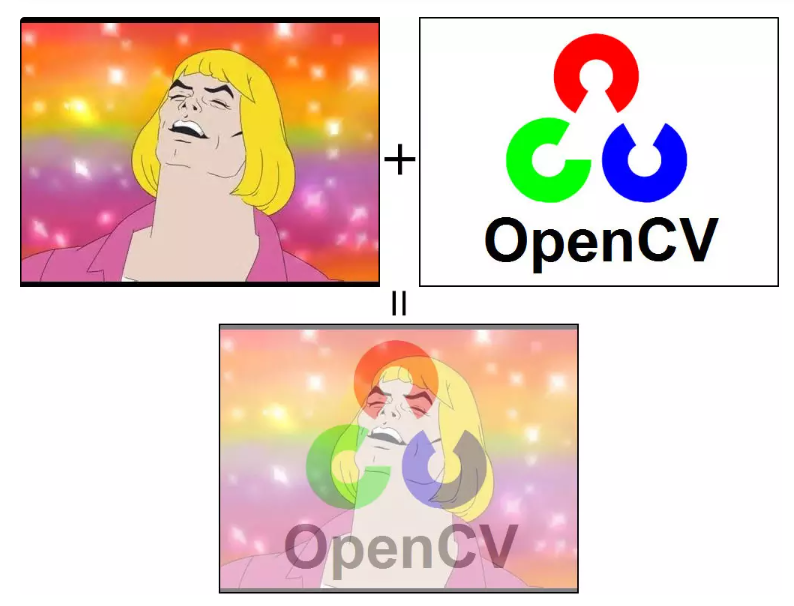

In [ ]:
import cv2
img = cv2.imread('meme_1.jpg')
logo = cv2.imread('meme_2.jpg')
output = cv2.addWeighted(img, 0.8, logo, 0.4, 80) 

cv2.imshow('oxxostudio', output)
cv2.waitKey(0)      # 按下任意鍵停止
cv2.destroyAllWindows()

##### subtract() 影像相減 
使用 OpenCV 的 subtract() 方法，可以將不同的影像中，同樣位置像素的顏色數值相減，\
例如圖片 A 某個像素的顏色為 (255,255,255) 白色，\
圖片 B 為 (0,255,255) 黃色，相減後就會變成藍色 (255,0,0)，疊加後最大的數值為 255，\
下方的例子，會將兩張圖片相減成一張圖片，相減後，白色因為減去了黃色 ( 255,255,255 - 0,255,255 )，\
就只剩下了藍色，而綠色因為減去黃色 ( 0,255,0 - 0,255,255 )，就變成黑色。

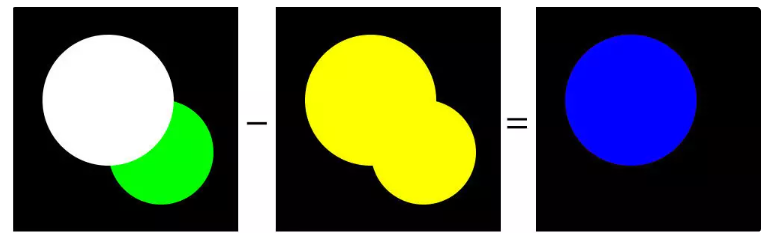

In [ ]:
import cv2
img = cv2.imread('test.png')
img2 = cv2.imread('test2.png')
output = cv2.subtract(img, img2)  # 相減
cv2.imwrite('output.png', output)
cv2.waitKey(0)       # 按下任意鍵停止
cv2.destroyAllWindows()

##### 影片的影像疊加 
延伸「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」和「[翻轉影片、改變影片尺寸](https://steam.oxxostudio.tw/category/python/ai/opencv-resize.html#a4)」文章的範例，在程式碼中使用 addWeighted() 方法，\
就能將電腦鏡頭拍攝的畫面，即時和其他圖片疊加。

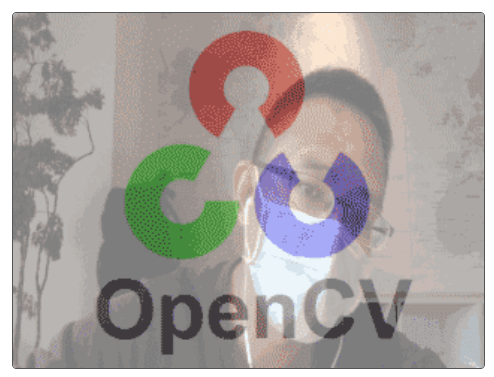

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
logo = cv2.imread('opencv-logo.jpg')
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    img_1 = cv2.resize(frame,(480, 360))    # 改變影像尺寸，符合疊加的圖片
    output = cv2.addWeighted(img_1, 0.5, logo, 0.3, 50)  # 疊加圖片
    cv2.imshow('oxxostudio', output)
    if cv2.waitKey(1) == ord('q'):
        break      # 按下 q 鍵停止
cap.release()
cv2.destroyAllWindows()